In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, hierarchical
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.mixture import GaussianMixture

In [174]:
dataset = pd.read_csv("Data_Cortex_Nuclear.csv")
dataset = dataset.drop(["MouseID","Behavior","Genotype", "Treatment", "class"],axis=1)
dataset

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,"0,503643884","0,747193224","0,4301753","2,81632854","5,990151664","0,218830018","0,177565491","2,373744337","0,232223754","1,750935592",...,"0,18885166","0,122652046",NaN,"0,106305209","0,108335872","0,427099198","0,114783227","0,131790029","0,128185603","1,67565235"
1,"0,51461708","0,689063548","0,411770344","2,789514042","5,685037861","0,211636155","0,172817023","2,292149909","0,226972108","1,596376881",...,"0,200403601","0,11668219",NaN,"0,106592156","0,10431543","0,441581289","0,111973507","0,13510297","0,1311187","1,743609645"
2,"0,509183088","0,730246795","0,418308781","2,687201071","5,622058542","0,209010905","0,175722212","2,283336522","0,230246795","1,561316243",...,"0,193684548","0,118508228",NaN,"0,108303056","0,106219278","0,435776875","0,111882881","0,133361829","0,127431075","1,926426587"
3,"0,442106692","0,61707615","0,358626307","2,466947197","4,97950319","0,222885842","0,176462604","2,152300801","0,207004208","1,595086195",...,"0,192111873","0,13278121",NaN,"0,103183762","0,111261965","0,391690992","0,130405268","0,147444165","0,146901093","1,700563438"
4,"0,434940244","0,617429838","0,358802202","2,36578488","4,718678663","0,213105949","0,173626964","2,134013697","0,192157916","1,504229891",...,"0,205604228","0,129954109",NaN,"0,104783757","0,110693923","0,434153803","0,118481435","0,140314282","0,148379919","1,839730218"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,"0,254860375","0,463591375","0,254860375","2,092082008","2,600035348","0,211735596","0,17126193","2,483739837","0,207317073","1,057971014",...,"0,275547445","0,190482875",NaN,"0,115805727","0,183323975","0,374087591","0,318781583","0,204660303","0,328326783","1,364823133"
1076,"0,272197962","0,474163028","0,251637555","2,161390102","2,801491994","0,251273654","0,182496361","2,512736536","0,216339156","1,081149927",...,"0,283206634","0,190463027",NaN,"0,113614375","0,175673808","0,375259157","0,325639254","0,200414651","0,293434692","1,364478231"
1077,"0,228699552","0,395179372","0,234118087","1,733183857","2,220852018","0,220665172","0,161434978","1,989723468","0,185164425","0,884342302",...,"0,290843155","0,216681777",NaN,"0,118948323","0,158295558","0,422121487","0,32130553","0,22919311","0,355213055","1,430825023"
1078,"0,221242406","0,412894376","0,243974133","1,876347247","2,384087791","0,208896727","0,173623359","2,086027827","0,192043896","0,922594552",...,"0,306700563","0,222262575",NaN,"0,125295079","0,196295624","0,397675685","0,335936081","0,251316506","0,365353187","1,404031233"


In [175]:
dataset = np.array(dataset)
dataset = [ [float(str(dataset[i][j]).replace(",",".")) for j in range(len(dataset[0]))] for i in range(len(dataset))]
dataset = pd.DataFrame(dataset)
dataset

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.275547,0.190483,NaN,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.283207,0.190463,NaN,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.290843,0.216682,NaN,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.306701,0.222263,NaN,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031


In [176]:
dataset.describe(include="all")

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


In [177]:
df = dataset.dropna()

In [178]:
pca = PCA(2)
df_2d = pca.fit_transform(df)

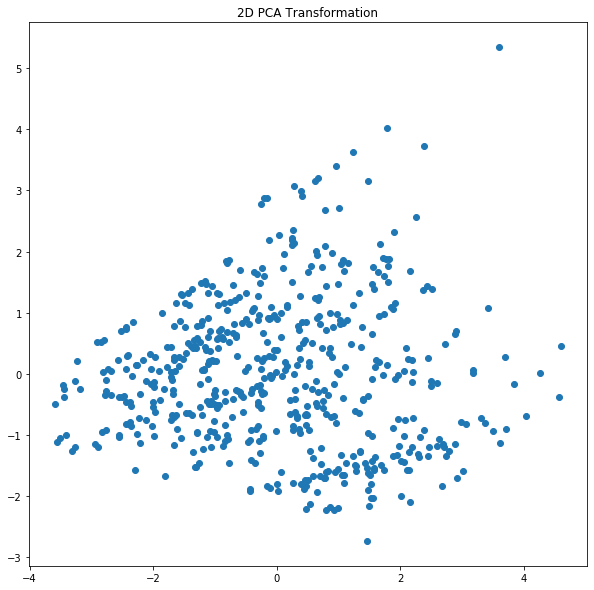

In [179]:
plt.figure(figsize=(10,10))
plt.scatter(df_2d[:,0],df_2d[:,1])
plt.title("2D PCA Transformation")
plt.show()

In [180]:
pca = PCA(3)
df_3d = pca.fit_transform(df)

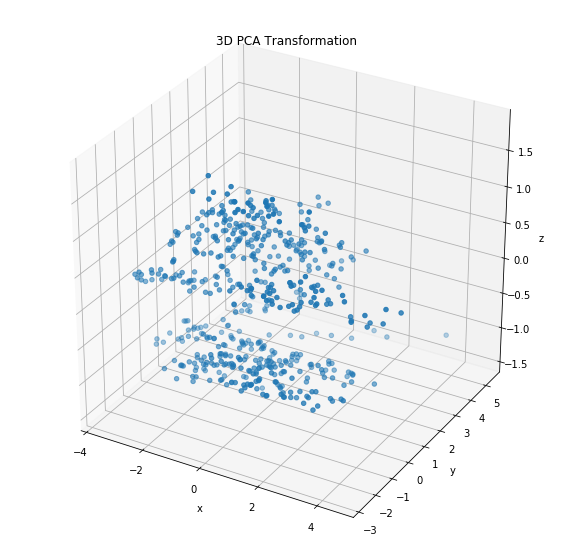

In [181]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.scatter(df_3d[:,0], df_3d[:,1], df_3d[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.title("3D PCA Transformation")
plt.show()

In [182]:
KMean_models = []
for n in range(2,5):
    model = KMeans(n_clusters=n, algorithm="full")
    model = model.fit_predict(df)
    KMean_models.append(model)

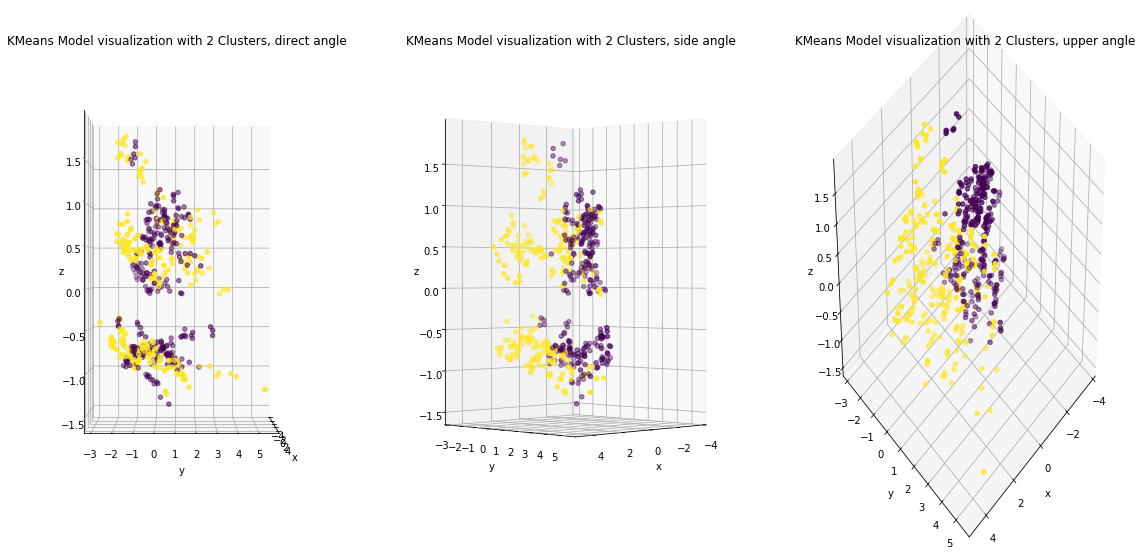

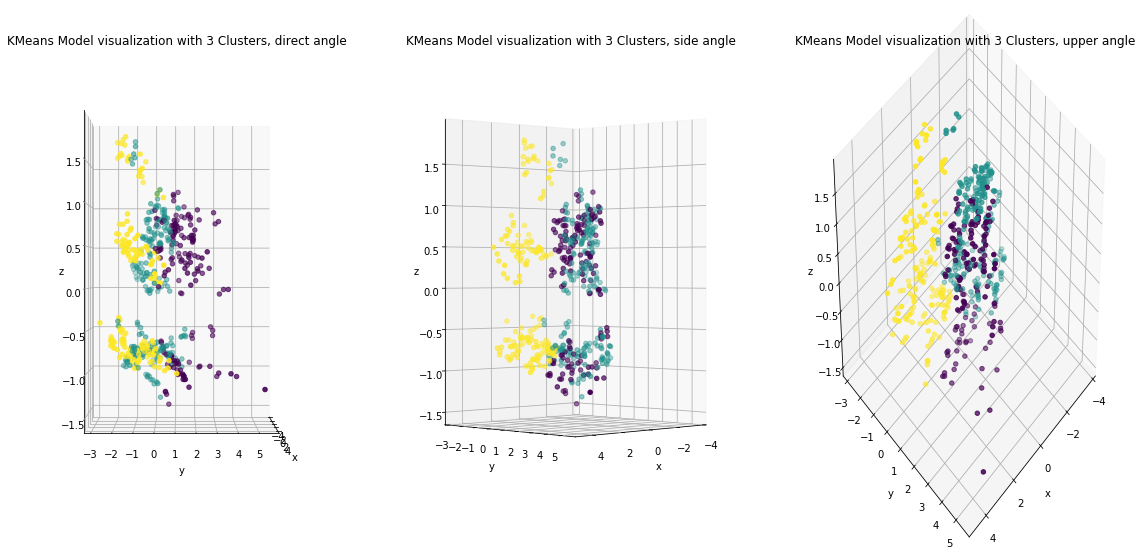

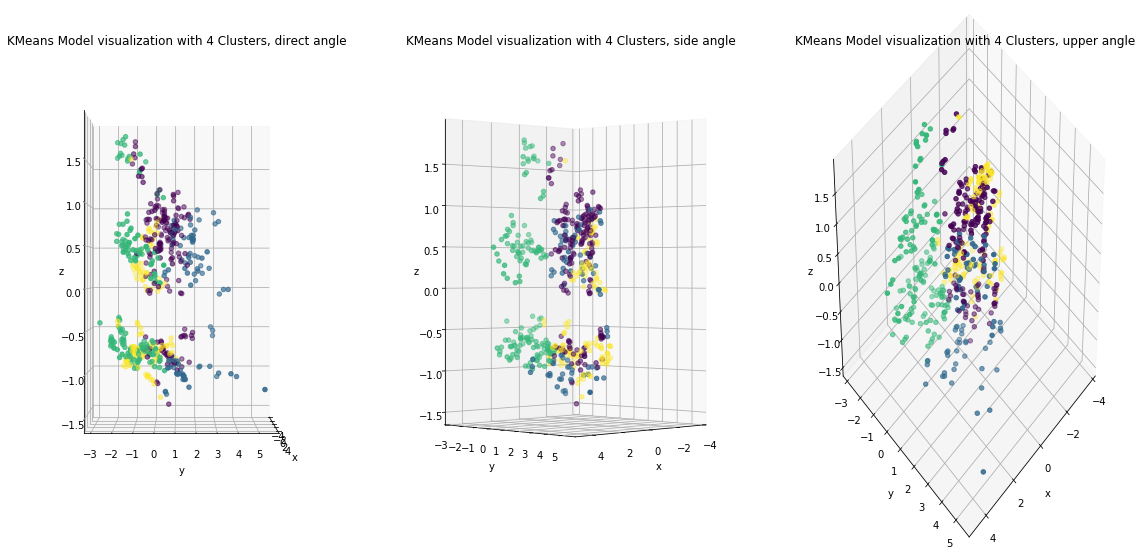

In [183]:
for model in KMean_models:
    fig = plt.figure(figsize=(20,10))
    
    ax1 = fig.add_subplot(1,3,1, projection = '3d')

    ax1.scatter(df_3d[:,0], df_3d[:,1], df_3d[:,2], c = model)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')
    ax1.view_init(0,0)
    plt.title("KMeans Model visualization with " + str(np.unique(model).size) + " Clusters, direct angle")
    
    ax2 = fig.add_subplot(1,3,2, projection = '3d')

    ax2.scatter(df_3d[:,0], df_3d[:,1], df_3d[:,2], c = model)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_zlabel('z')
    ax2.view_init(0,45)  
    plt.title("KMeans Model visualization with " + str(np.unique(model).size) + " Clusters, side angle")
    
    ax3 = fig.add_subplot(1,3,3, projection = '3d')

    ax3.scatter(df_3d[:,0], df_3d[:,1], df_3d[:,2], c = model)
    ax3.set_xlabel('x')
    ax3.set_ylabel('y')
    ax3.set_zlabel('z')
    ax3.view_init(45,45)
    plt.title("KMeans Model visualization with " + str(np.unique(model).size) + " Clusters, upper angle")

In [184]:
GMM_Models = []
for n in range(2,5):
    model = GaussianMixture(n_components=n, max_iter=500, init_params="kmeans", covariance_type="diag")
    model = model.fit_predict(df)
    GMM_Models.append(model)

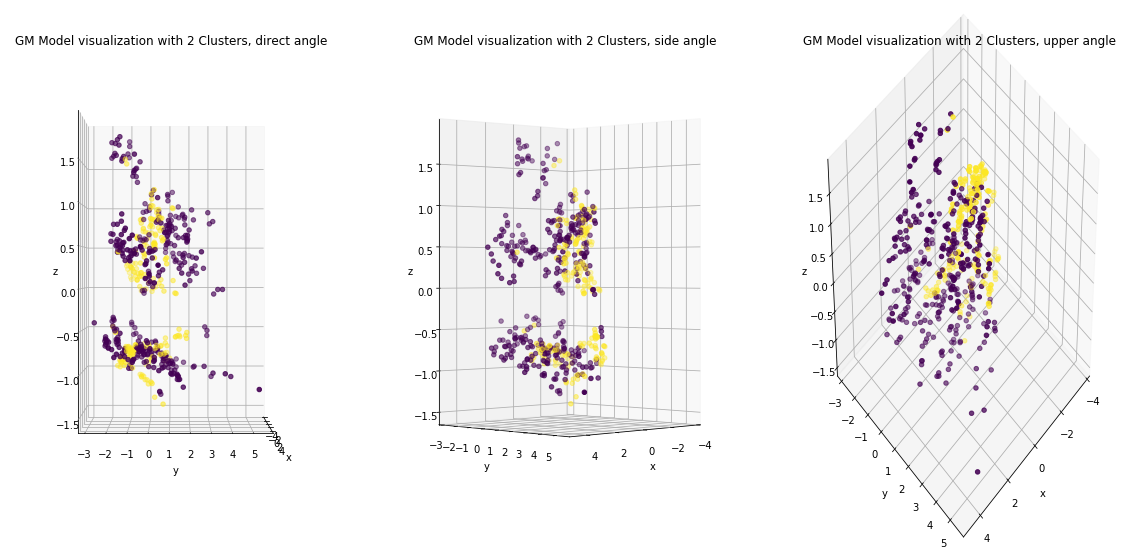

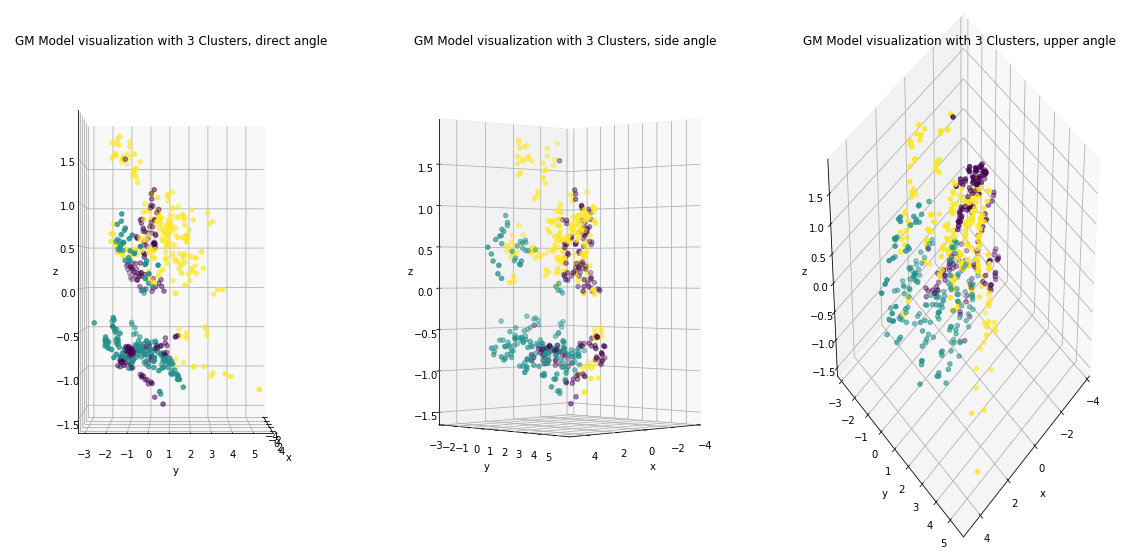

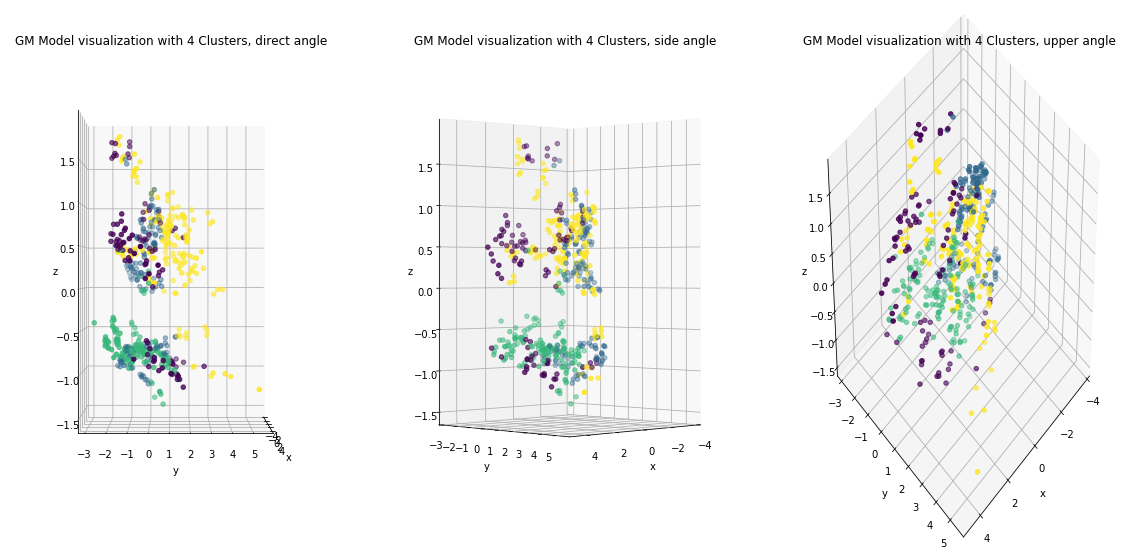

In [185]:
for model in GMM_Models:
    fig = plt.figure(figsize=(20,10))
    
    ax1 = fig.add_subplot(1,3,1, projection = '3d')

    ax1.scatter(df_3d[:,0], df_3d[:,1], df_3d[:,2], c = model)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')
    ax1.view_init(0,0)
    plt.title("GM Model visualization with " + str(np.unique(model).size) + " Clusters, direct angle")
    
    ax2 = fig.add_subplot(1,3,2, projection = '3d')

    ax2.scatter(df_3d[:,0], df_3d[:,1], df_3d[:,2], c = model)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_zlabel('z')
    ax2.view_init(0,45)  
    plt.title("GM Model visualization with " + str(np.unique(model).size) + " Clusters, side angle")
    
    ax3 = fig.add_subplot(1,3,3, projection = '3d')

    ax3.scatter(df_3d[:,0], df_3d[:,1], df_3d[:,2], c = model)
    ax3.set_xlabel('x')
    ax3.set_ylabel('y')
    ax3.set_zlabel('z')
    ax3.view_init(45,45)
    plt.title("GM Model visualization with " + str(np.unique(model).size) + " Clusters, upper angle")